In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se

In [2]:
x = np.array([95, 85, 80, 70, 60])
y = np.array([85, 95, 70, 65, 70])

In [27]:
# Polynomial Function
model = np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

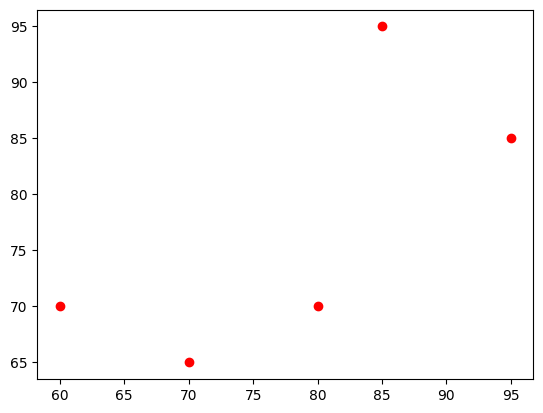

In [30]:
# lets visualize using scatter plot
plt.scatter(x, y, c='red')
plt.show()

In [31]:
# poly1d: gives function
result = np.poly1d(model)
print(result)

 
0.6438 x + 26.78


In [35]:
predict = np.poly1d(model)
predict(60)
# 0.6438 * 60 + 26.78 = 65.41095890410958

65.41095890410958

In [36]:
y_pred = predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [37]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y, y_pred)

0.4803218090889324

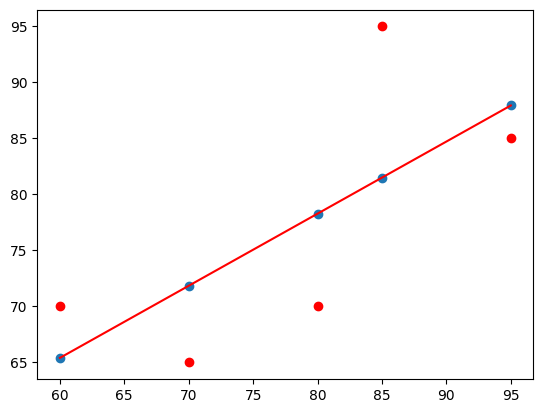

In [47]:
y_line = model[1]+model[0]*x
plt.plot(x, y_line, c='r')
plt.scatter(x, y_pred)
plt.scatter(x, y, c='r')
plt.show()

In [49]:
data = pd.read_csv('Boston.csv')

In [50]:
data.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
data['crim']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64

In [52]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [55]:
x = data.drop(['crim'], axis=1)
y = data['crim']
# x
y

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
# xtrain
# ytrain
# xtest
# ytest

436    14.42080
473     4.64689
158     1.34284
378    23.64820
321     0.18159
         ...   
123     0.15038
187     0.07875
372     8.26725
433     5.58107
364     3.47428
Name: crim, Length: 102, dtype: float64

In [63]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)

In [67]:
ytrain_pred = lm.predict(xtrain)
# ytrain_pred
ytest_pred = lm.predict(xtest)
# ytest_pred

array([ 1.68504187e+01,  9.92340386e+00,  4.82248827e-01,  1.55428933e+01,
       -6.53723063e-01,  1.42501704e+01,  1.05299828e+00,  1.68983842e+00,
       -3.19136447e-01,  2.87239155e+00,  5.40988507e-01,  2.01010659e+00,
       -4.18979967e-01,  9.64031641e+00, -6.62334600e-01,  1.76664918e+01,
       -9.44837857e-01,  4.32612336e-01, -1.94707096e-01,  1.35452725e+00,
       -4.76760188e+00,  1.34026842e+01,  1.41439305e+00,  1.25752687e+00,
        1.50965041e+01, -2.69147519e+00, -1.48604542e-02,  1.32182452e+01,
        2.31181960e+00, -2.58641250e+00,  2.01576012e+01,  8.22787370e-01,
        1.20657190e+01,  1.72543045e+00, -6.13080473e-01,  1.35776997e+01,
       -3.16377496e+00,  3.32577153e+00,  1.69106013e+01,  1.10529471e+00,
        1.42576010e+01,  2.89803574e+00,  2.30707285e+00,  4.36797480e-02,
       -3.55507256e+00,  2.94031384e+00,  1.26363462e+00,  1.54575372e+00,
        2.82932204e+00,  1.52479031e+01,  3.77256220e+00,  1.58436488e+00,
       -2.15310114e+00,  

In [69]:
data=(ytrain_pred, ytrain)
# data
data = (ytest_pred, ytest)

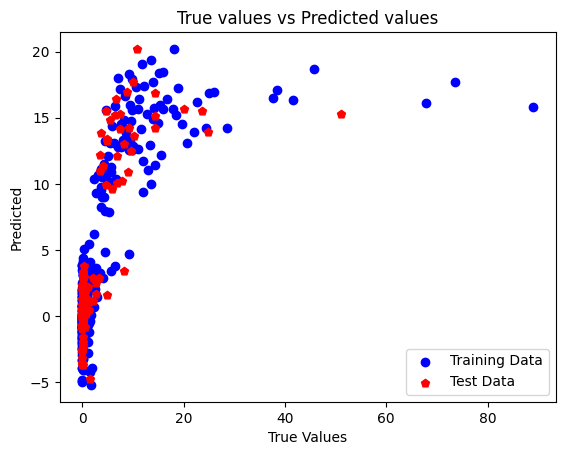

In [81]:
plt.scatter(ytrain, ytrain_pred, c='blue', marker='o', label="Training Data")
plt.scatter(ytest, ytest_pred, c='red', marker='p', label="Test Data")
plt.xlabel("True Values")
plt.ylabel("Predicted")
plt.title("True values vs Predicted values")
plt.legend(loc='lower right')
plt.plot()
plt.show()

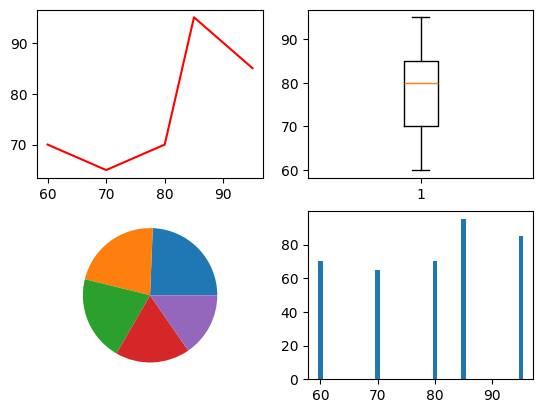

In [26]:
plt.subplot(2, 2, 1)
plt.plot(x, y, color='red')

plt.subplot(2, 2, 2)
plt.boxplot(x)

plt.subplot(2, 2, 3)
# plt.pie([1], colors='red')
plt.pie(x)

plt.subplot(2, 2, 4)
plt.bar(x, y)

plt.show()